### Analisi Lunghezza-Periodo nel pendolo e misura di $g$   

In questo notebook analizzeremo i dati sperimentali di un pendolo semplice per determinare l'accelerazione di gravità $g$ e valutare la compatibilità dei risultati con il valore teorico atteso.  

Le operazioni principali saranno:  
1. **Calcolo dei periodi medi $T$ e delle incertezze $\Delta T$**:  
   - Raggruppando i dati per lunghezza $L$, calcoleremo:  
     - La media dei periodi $T$ per ogni $L$.  
     - L'incertezza $\Delta T$, definita come il massimo tra la deviazione standard dei $T$ e l'incertezza strumentale.  
   - Le incertezze $\Delta L$ saranno prese direttamente dai dati (sensibilità dello strumento).  

2. **Calcolo di $g$ e $\Delta g$**:  
   - Utilizzando la relazione teorica $T = 2\pi \sqrt{\frac{L}{g}}$, ricaveremo $g$ per ogni lunghezza.  
   - Propagando gli errori, calcoleremo l'incertezza associata $\Delta g$.  

3. **Visualizzazione grafica**:  
   - Graficheremo la relazione lunghezza-periodo, con barre di errore e sovrapposizione della curva teorica.  

4. **Valutazione dei risultati**:  
   - Analizzeremo i valori calcolati di $g$ per verificarne la compatibilità con il valore teorico $g = 9.81$ m/s².  


In [2]:
import pandas as pd
import numpy as np

# Leggere i dati dal file CSV
data = pd.read_csv('../../risorse/data.csv')

# Raggruppare i dati per lunghezza
grouped_data = data.groupby('L')

# Calcolo dei valori medi e delle incertezze
results = grouped_data.mean()  # Calcolo della media
results['dT'] = grouped_data['T'].std().clip(lower=grouped_data['dT'].max().values)  # Incertezza su T
results['dL'] = grouped_data['dL'].mean().values  # Incertezza su L (sensibilità dello strumento)

# Reset dell'indice per riabilitare la colonna L
results.reset_index(inplace=True)

# Calcolo di g e propagazione degli errori
results['g'] = (4 * np.pi**2 * results['L']) / (results['T']**2)
results['dg'] = results['g'] * np.sqrt((2 * results['dT'] / results['T'])**2 + (results['dL'] / results['L'])**2)

# Scrivere i risultati in un file CSV
results = results[['L', 'dL', 'T', 'dT', 'g', 'dg']]
results.to_csv('out/processed_data.csv', index=False)



### Grafico Lunghezza-Periodo  

Il grafico rappresenta la relazione tra la lunghezza del pendolo $L$ e il suo periodo medio $T$.  
- Le **barre di errore** indicano le incertezze su $L$ ($\Delta L$) e su $T$ ($\Delta T$).  
- La curva teorica per il periodo è calcolata utilizzando la relazione $T = 2\pi \sqrt{\frac{L}{g}}$ con $g = 9.81$ m/s².  



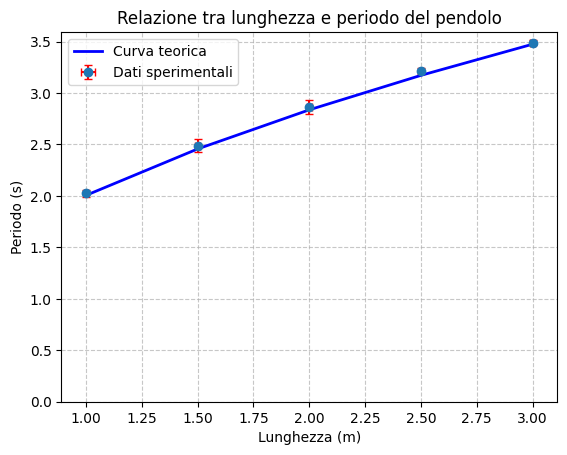

In [44]:
import matplotlib.pyplot as plt

# Calcolo della curva teorica
g_theoretical = 9.81  # Valore atteso
theoretical_period = 2 * np.pi * (results['L'] / g_theoretical)**0.5

# Creare il grafico
plt.errorbar(results['L'], results['T'], xerr=results['dL'], yerr=results['dT'], fmt='o', 
             ecolor='red', capsize=3, label='Dati sperimentali')
plt.plot(results['L'], theoretical_period, label='Curva teorica', color='blue', linewidth=2)

# Impostare il minimo dell'asse y a 0
plt.ylim(0)

# Aggiungere il titolo e le etichette
plt.title("Relazione tra lunghezza e periodo del pendolo")
plt.xlabel("Lunghezza (m)")
plt.ylabel("Periodo (s)")

# Mostrare la griglia e la legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Salvare il grafico
plt.savefig('out/pendulum_plot.png')

# Visualizzare il grafico
plt.show()


### Calcolo del Valore Medio di $g$  

Per determinare un valore unico di $\overline{g}$, calcoliamo la media aritmetica dei valori $ g_i $. 
L'incertezza totale $ \Delta g $ viene calcolata sommando semplicemente le incertezze individuali $ \Delta g_i $ e dividendo il risultato per il numero di misure $ N $:  
$$
\overline{g} = \frac{\sum g_i}{N}
$$  
$$
\Delta g = \frac{\sum \Delta g_i}{N}
$$  


In [42]:
# Calcolo della media aritmetica di g
g_mean = results['g'].mean()

# Calcolo dell'incertezza come somma semplice divisa per il numero di misure
dg_mean = results['dg'].sum() / len(results)

# Calcolo del valore massimo e minimo dell'intervallo di validità
g_min = g_mean - dg_mean
g_max = g_mean + dg_mean

# Stampa del risultato
print(f"Risultato sperimentale: ({g_mean:.3f} ± {dg_mean:.3f}) m/s²")
print(f"Intervallo di validità: [{g_min:.3f}, {g_max:.3f}] m/s²")


Risultato sperimentale: (9.614 ± 0.330) m/s²
Intervallo di validità: [9.283, 9.944] m/s²


### Valutazione dell'Esperimento  

Il valore medio calcolato di $g$ è:  
$$
g = (9.614 \pm 0.330) \, \text{m/s}^2
$$  
con l'intervallo di validità:  
$$
[9.283, 9.944] \, \text{m/s}^2
$$  

Confrontando con il valore teorico $g_{\text{teorico}} = 9.81 \, \text{m/s}^2$, possiamo osservare che:  
- Il valore teorico $9.81 \, \text{m/s}^2$ **è compreso** nell'intervallo calcolato.  

### Conclusione:  

L'esperimento può considerarsi **riuscito**, poiché il valore teorico è compatibile con il risultato sperimentale entro l'incertezza calcolata.  
